In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split 

In [59]:
hr= pd.read_csv(r"E:\Adv Analytics\Cases\human-resources-analytics\HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [60]:
dum_hr = pd.get_dummies(hr, drop_first =True)
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14991,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14992,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14993,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [79]:
train,test = train_test_split(dum_hr, test_size=0.3, random_state = 23,stratify= dum_hr['left'])
x_train = train.drop('left', axis=1)
y_train= train['left']

In [71]:
x_test = test.drop('left', axis=1)
y_test = test['left']



In [72]:
dtc = DecisionTreeClassifier(random_state=23,
                             max_depth=3)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=23)

In [73]:
y_pred = dtc.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[3322  107]
 [  90  980]]
0.9562124916648144


In [74]:
depths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
scores = []
for i in depths:
    dtc = DecisionTreeClassifier(random_state=23,
                                max_depth=i)
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

max_score = np.max(scores)
i_max = np.argmax(scores)
best_depth = depths[i_max]
print("Best Depth =", best_depth)
print("Best Score =", max_score)

Best Depth = 9
Best Score = 0.9786619248721938


In [75]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=9)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=23)

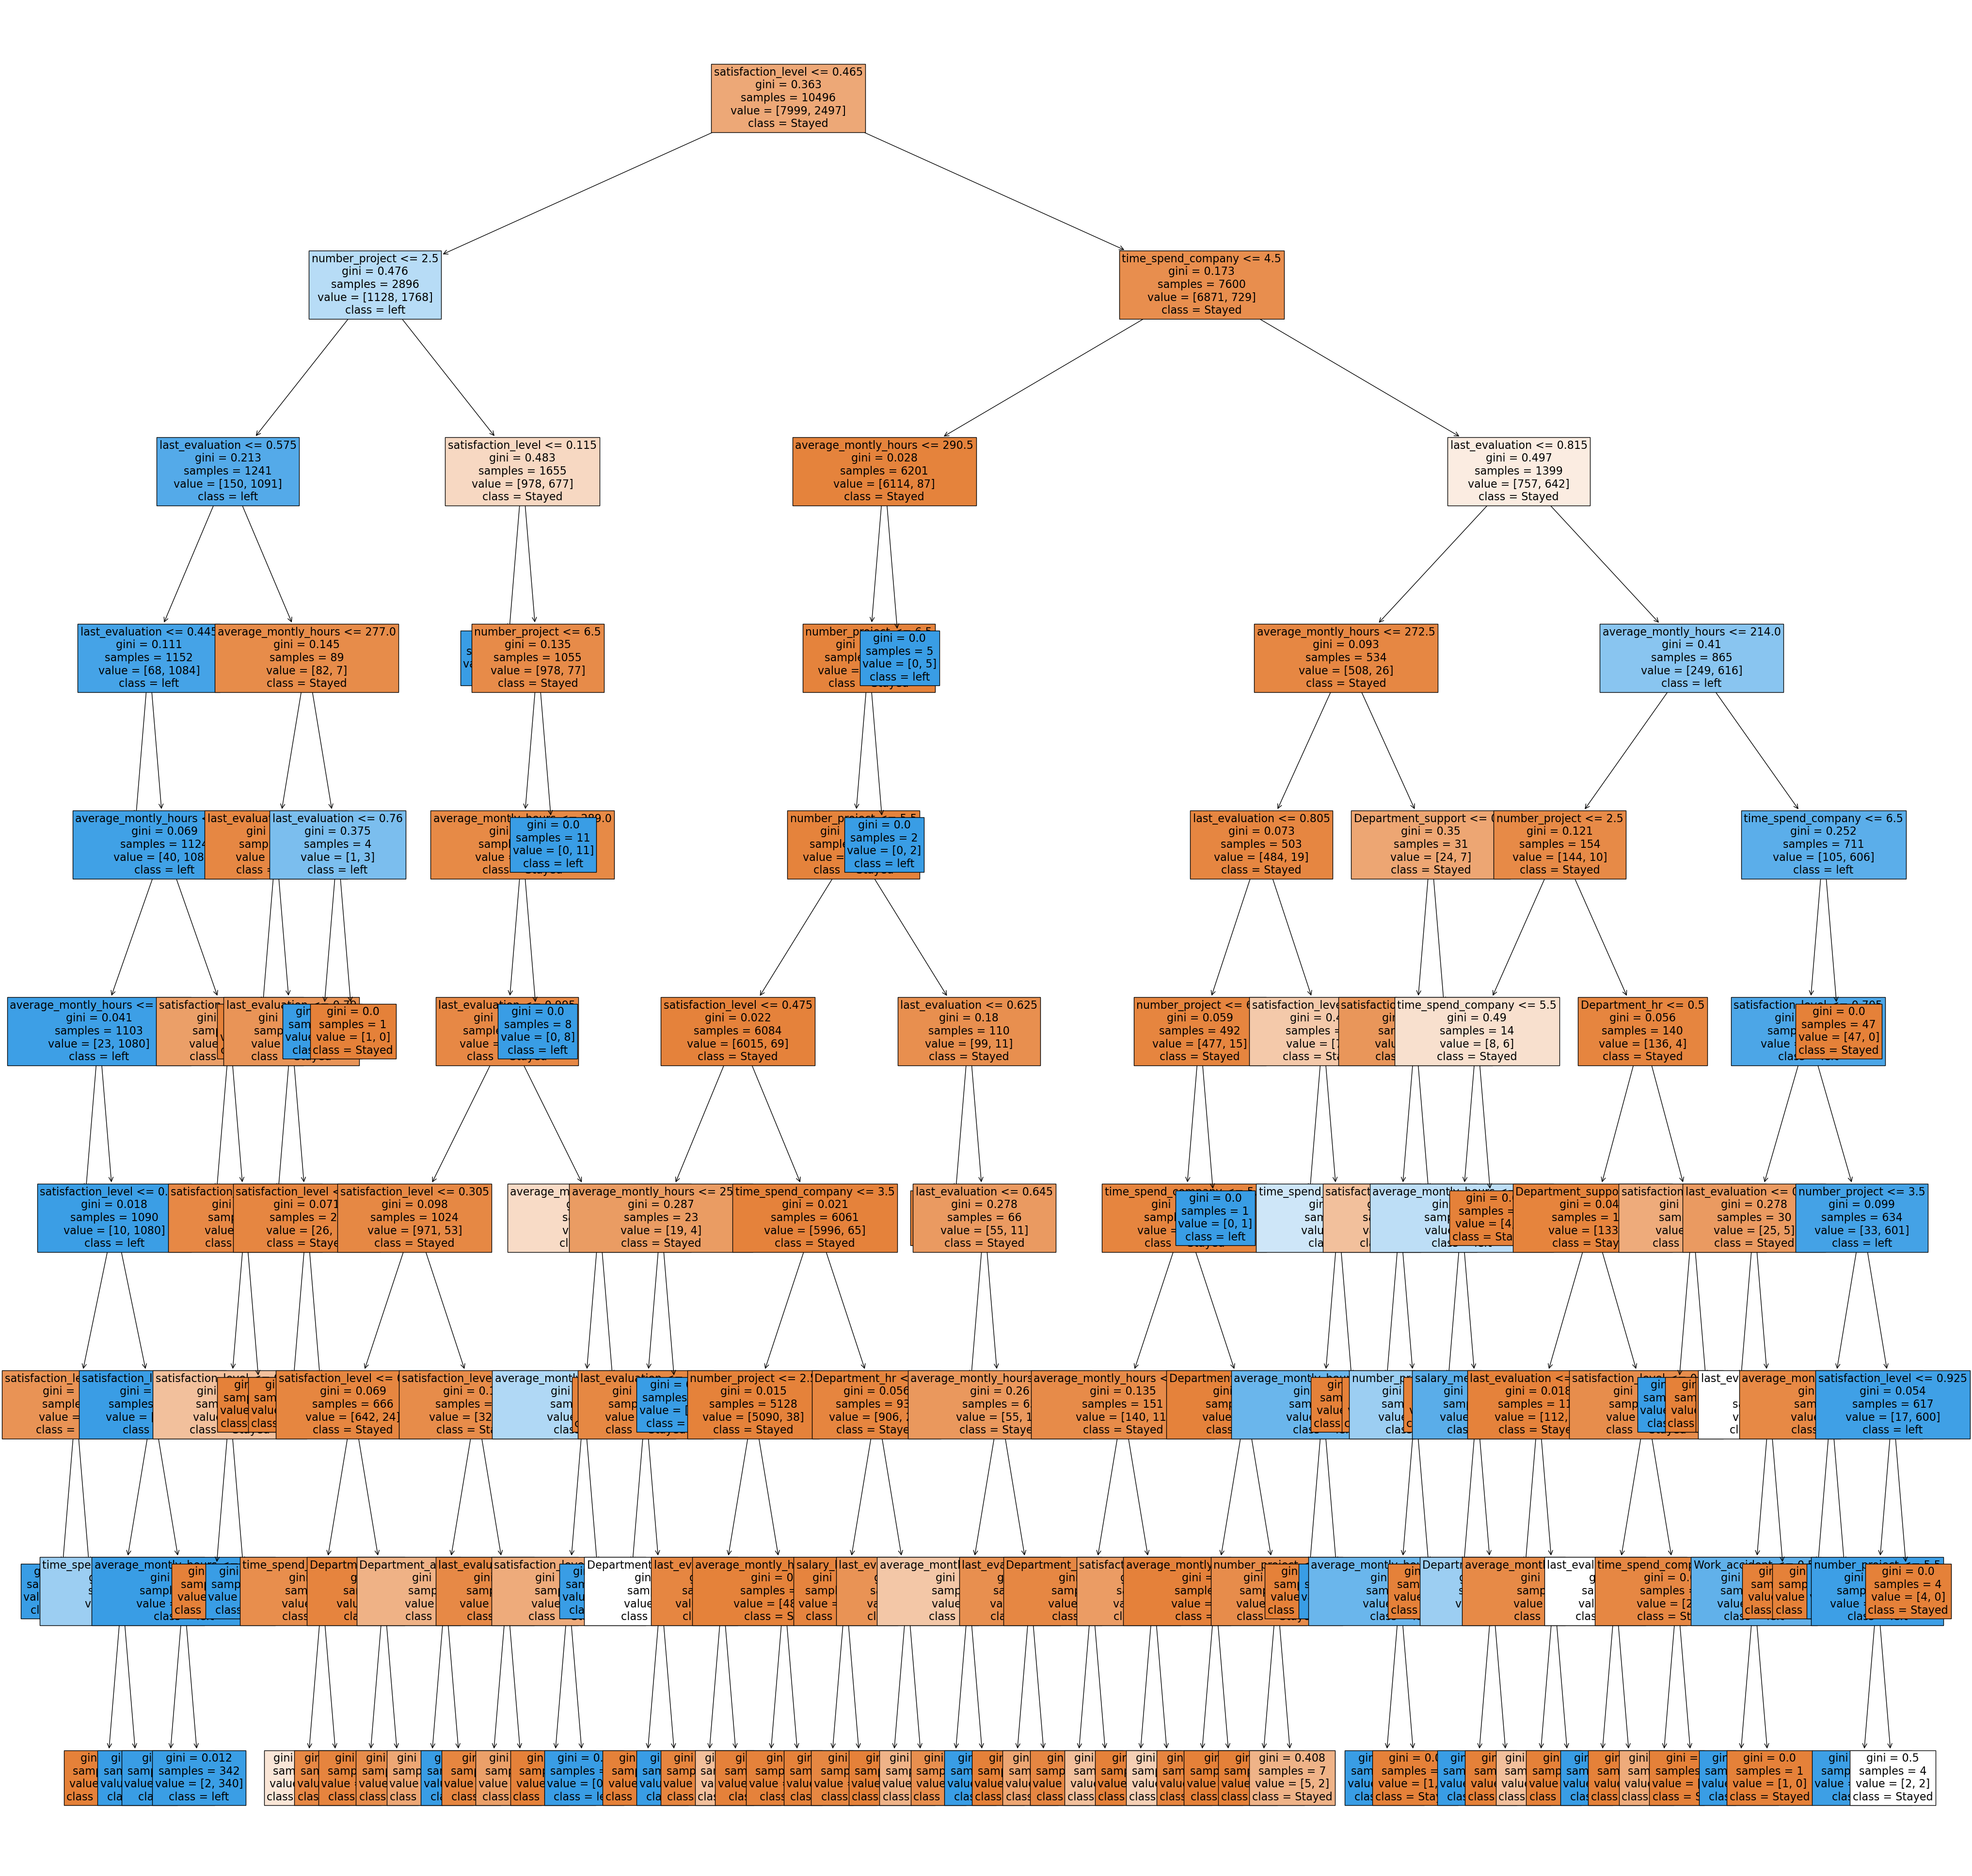

In [80]:

plt.figure(figsize=(50,50))
tree.plot_tree(dtc,feature_names=x_train.columns,
               filled=True,fontsize=16,
               class_names=['Stayed', 'left'])
plt.show()